In [28]:
# load an arbitraty sal frame
import cv2 as cv
import numpy as np

frame = cv.imread('../data/demo/E4/sal/0429.jpeg')

In [29]:
import matplotlib.pyplot as plt

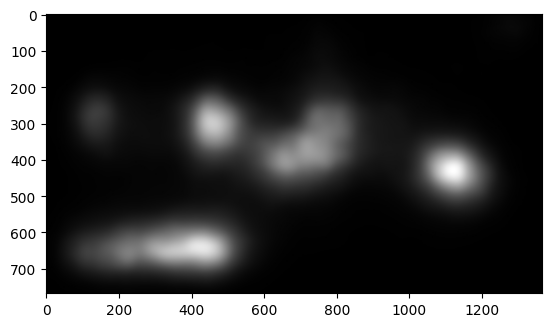

In [30]:
plt.imshow(frame, cmap='gray')

In [31]:
def get_contours(frame: np.array) -> list:
    '''
    Returns a list of contours in the frame

    Parameters:
        frame (np.array): binary image to be processed

    Returns:
        list: A list of contours in the frame
    '''
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    _, bi = cv.threshold(frame, 31, 255, 0)
    contours, _ = cv.findContours(bi, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return contours
    
def get_contour_center(contour):
    # for each contour get the center
    centers = []
    for c in contour:
        M = cv.moments(c)
        if M["m00"] == 0:
            continue
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centers.append((cX, cY))
    return centers

In [32]:
def get_brighter_pixel(frame: np.array) -> tuple:
    '''
    Returns a list with all brighter pixels in the frame

    Parameters:
        frame (np.array): binary image to be processed

    Returns:
        list[tuple]: A list with all brighter pixels in the frame
    '''
    brighter_pixel = np.unravel_index(np.argmax(frame), frame.shape)
    # get all pixels with the same value as the brighter pixel
    values = np.where(frame == frame[brighter_pixel])
    return list(zip(values[0], values[1]))

In [33]:
points = get_brighter_pixel(cv.cvtColor(frame, cv.COLOR_BGR2GRAY))
print(points)

[(427, 1119), (427, 1120), (427, 1121), (427, 1122), (427, 1123), (428, 1119), (428, 1120), (428, 1121), (428, 1122), (428, 1123), (428, 1124), (429, 1118), (429, 1119), (429, 1120), (429, 1121), (429, 1122), (429, 1123), (429, 1124), (429, 1125), (430, 1118), (430, 1119), (430, 1120), (430, 1121), (430, 1122), (430, 1123), (430, 1124), (430, 1125), (431, 1119), (431, 1120), (431, 1121), (431, 1122), (431, 1123), (431, 1124), (432, 1119), (432, 1120), (432, 1121), (432, 1122), (432, 1123), (432, 1124), (433, 1125)]


In [34]:
centers = get_contour_center(get_contours(frame))

cv.drawContours(frame, get_contours(frame), -1, (255, 0, 255), 2)
# for center in points:
#     cv.circle(frame, center[::-1], 10, (255, 0, 255), -1)

#draw a circle in the center of the screen
# height, width, _ = frame.shape
# cv.circle(frame, (width//2, height//2), 10, (255, 0, 255), -1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

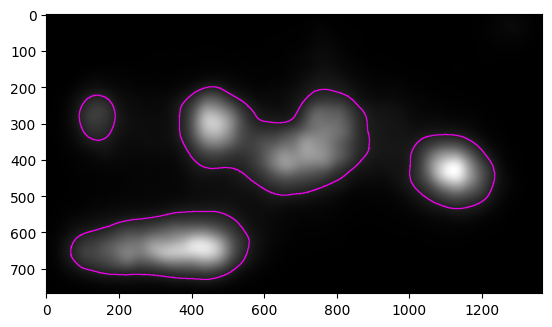

In [35]:
plt.imshow(frame)

In [36]:
cv.imwrite('points.jpeg', frame)

True